In [1]:
import geopandas as gpd

In [2]:
nyc = gpd.read_file(gpd.datasets.get_path("nybb"))

In [3]:
centroid = nyc.geometry.centroid

In [4]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots() 
nyc.plot(ax = ax, color = "white", edgecolor = "black") 
centroid.plot(ax = ax, marker = "o", color = "red")

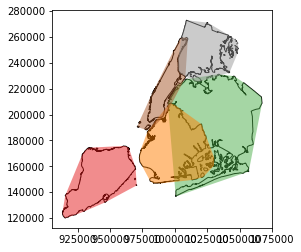

In [5]:
convex_hull = nyc.geometry.convex_hull
fig, ax = plt.subplots()
nyc.plot(ax = ax, color = "white", edgecolor = "black")
convex_hull.plot(ax = ax, cmap = plt.get_cmap("Set1"), alpha = 0.5)

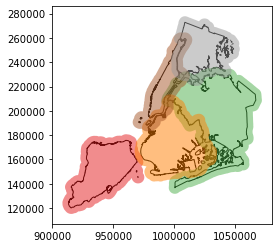

In [6]:
buffer = nyc.geometry.buffer(5000)
fig, ax = plt.subplots()
nyc.plot(ax = ax, color = "white", edgecolor = "black")
buffer.plot(ax = ax, cmap = plt.get_cmap("Set1"), alpha = 0.5)

In [7]:
print(nyc.crs)

{'proj': 'lcc', 'lat_1': 40.66666666666666, 'lat_2': 41.03333333333333, 'lat_0': 40.16666666666666, 'lon_0': -74, 'x_0': 300000, 'y_0': 0, 'datum': 'NAD83', 'units': 'us-ft', 'no_defs': True}


In [8]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))

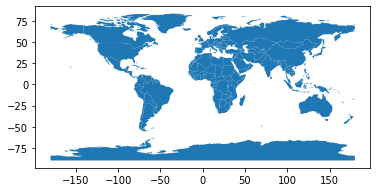

In [9]:
world.plot()

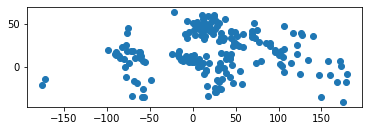

In [10]:
cities.plot()

In [11]:
south_america = world[world["continent"] == "South America"]
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."


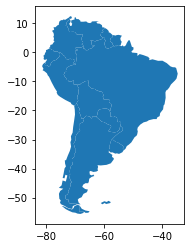

In [12]:
south_america.plot()

In [13]:
south_america_cities = gpd.sjoin(cities,south_america,how='inner',op="within")

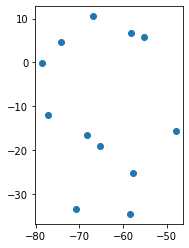

In [14]:
south_america_cities.plot()

In [15]:
cities_buffer= south_america_cities.geometry.buffer(2)

In [30]:
cities_buffer_gdf = gpd.GeoDataFrame(geometry = cities_buffer,crs = south_america_cities.crs)#new geodataframe
print(cities_buffer_gdf.crs)

{'init': 'epsg:4326'}


In [17]:
areas_not_near = gpd.overlay(south_america,cities_buffer_gdf, how='difference')

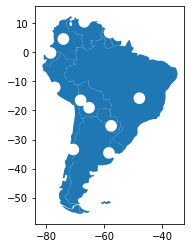

In [18]:
areas_not_near.plot()

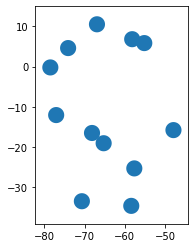

In [19]:
cities_buffer_gdf.plot()

In [20]:
continent = world.dissolve(by="continent")

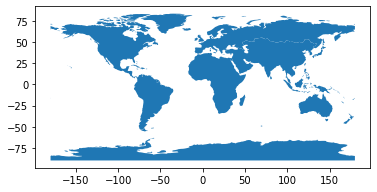

In [21]:
continent.plot()

In [22]:
world_geom = world[["geometry","iso_a3"]]
world_name = world[["name","iso_a3"]]

In [23]:
world_merged = world_geom.merge(world_name, on = 'iso_a3')

In [24]:
world_merged.head()

,geometry,iso_a3,name
0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina


In [25]:
europe = world[world['continent'] == "Europe"]

In [26]:
europe_cities = gpd.sjoin(cities,europe, how = 'inner', op = 'within')

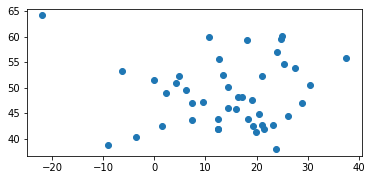

In [27]:
europe_cities.plot()